<a href="https://colab.research.google.com/github/YasamanMoradifard/Data-Science-Survival-Skills/blob/main/Ex_3_What_is_Actually_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3: What is actually data

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BAGLS_PATH = "Mini_BAGLS_dataset"

## read and write path, file names, ...

### 1- OS

In [3]:
# get all filenames (JUST NAMES)
files = os.listdir(BAGLS_PATH)

# what is os.listdir() returning?
# type ==> list()
print(type(files))

print(files)

<class 'list'>
['41.png', '32.png', '66.meta', '9.png', '94_seg.png', '11.meta', '33.meta', '13_seg.png', '36.meta', '37.png', '5.png', '45.meta', '93_seg.png', '43_seg.png', '64.png', '27.meta', '87_seg.png', '4.meta', '29.meta', '68_seg.png', '82.png', '97.png', '99_seg.png', '43.meta', '87.png', '4_seg.png', '53_seg.png', '25.meta', '16.meta', '40.meta', '73_seg.png', '24.meta', '3.meta', '79.png', '27_seg.png', '93.meta', '8.png', '29_seg.png', '30_seg.png', '65_seg.png', '35.png', '48_seg.png', '94.meta', '54.meta', '6.png', '7.png', '65.meta', '32.meta', '49_seg.png', '2.meta', '81.png', '64_seg.png', '91_seg.png', '11.png', '51.png', '0.meta', '1_seg.png', '87.meta', '86.png', '38.meta', '73.png', '18.png', '58.meta', '97_seg.png', '68.png', '74.png', '42_seg.png', '13.meta', '6_seg.png', '92_seg.png', '12_seg.png', '55_seg.png', '92.meta', '1.png', '62.png', '98.meta', '66.png', '80.png', '3.png', '28.png', '67.png', '60.meta', '35_seg.png', '72_seg.png', '6.meta', '14.png', '8

In [4]:
# get all unique filenames (just .meta)
filenames = [f for f in files if '.meta' in f]
#filenames

In [5]:
print(f"all files: {len(files)}\njust .meta files: {len(filenames)}")

all files: 300
just .meta files: 100


### 2- Pathlib

In [6]:
from pathlib import Path
path_pathlib = Path(BAGLS_PATH)
path_pathlib
path_pathlib.is_file() # is_file or is_dir ?

False

In [7]:
# concatenate path + make a new path
new_path = path_pathlib / "64.png"

path_pathlib
new_path
new_path.is_dir()

False

In [8]:
# Get the parent directory
new_path.parent

PosixPath('Mini_BAGLS_dataset')

In [9]:
# Get the file name
new_path.name

'64.png'

In [10]:
# File name + extension
new_path.name.split(".")

['64', 'png']

In [11]:
# Get the file extension
new_path.stem

'64'

In [12]:
# Check if the path exist
new_path.exists()

True

In [13]:
# file or directory?
new_path.is_dir()

False

In [14]:
new_path.is_file()

True

In [15]:
new_path.parent.is_file()

False

In [16]:
# Finde files or directories that match certain criteria
#for path in path_pathlib.glob("*.meta"):
  #print(path)

### 3- glob

In [17]:
import glob

glob_filenames = glob.glob(BAGLS_PATH + "/*.meta")
type(glob_filenames)
#glob_filenames

list

In [18]:
# Iterate over the filenames
# enumerate: when you wanna iterate and needs the index too
for idx, f in enumerate(glob_filenames):
  print(f"index: {idx} --------- file name: {f}")
  break

index: 0 --------- file name: Mini_BAGLS_dataset/66.meta


## Images - General

In [19]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2

### 1- load image

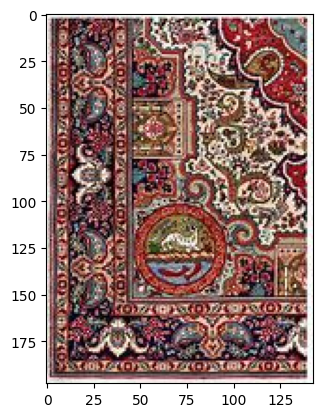

In [20]:
# io
img_path = "persian_carpet.jpg"
img = io.imread(img_path)

plt.imshow(img)
plt.show()

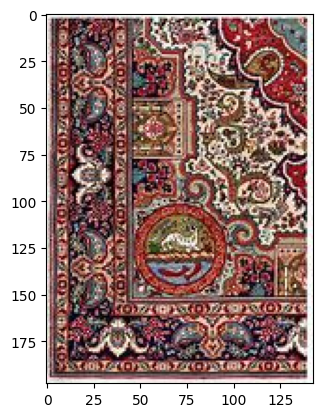

In [21]:
# Pillow
img = Image.open(img_path)

plt.imshow(img)
plt.show()

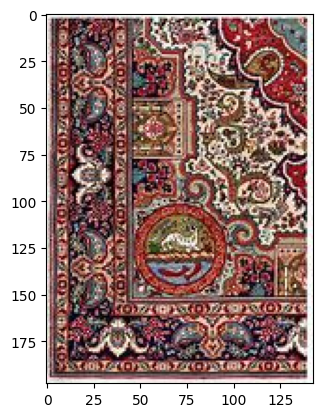

In [22]:
# sklearn

img = skimage.io.imread(img_path)

plt.imshow(img)
plt.show()

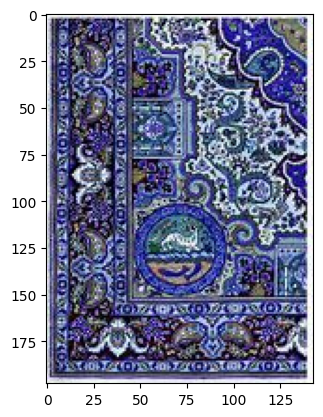

In [23]:
# OpenCv

img = cv2.imread(img_path)

plt.imshow(img)
plt.show()

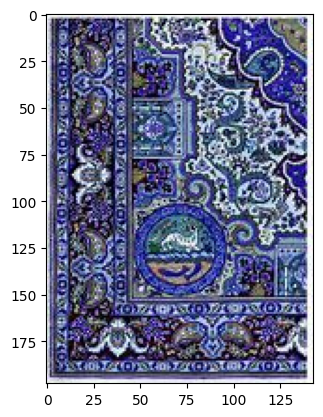

In [24]:
# OpenCv

img = cv2.imread(img_path)

plt.imshow(img, cmap = 'gray')
plt.show()

### 2- Histogram

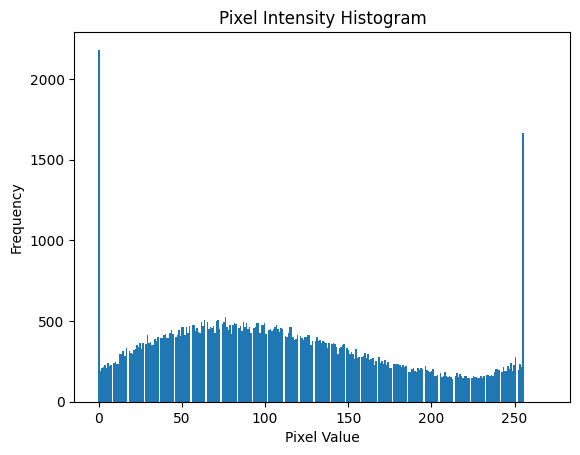

In [25]:
plt.hist(img.ravel(), bins=300, range=[-1, 270])
plt.title("Pixel Intensity Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### 3- Basic Image Manipulation

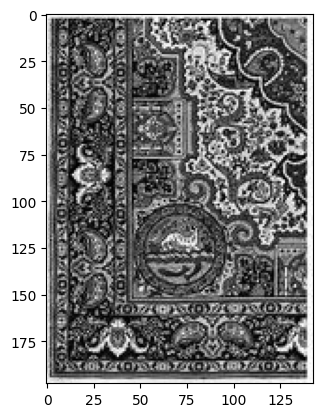

In [26]:
# Convert 2 GrayScale

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [27]:
img.shape

(198, 143, 3)

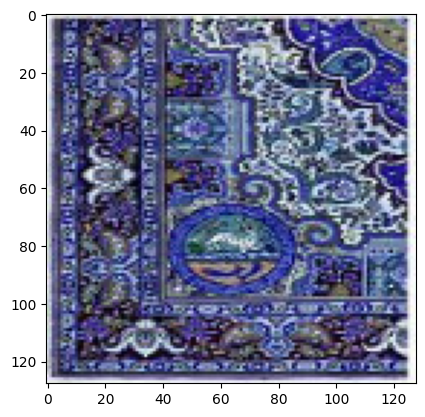

In [28]:
# Resize
resized_img = cv2.resize(img, (128, 128))
plt.imshow(resized_img)
plt.show()

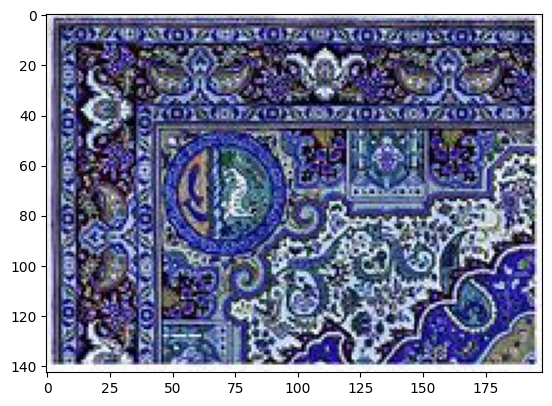

In [29]:
# Rotate
rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated_img)
plt.show()

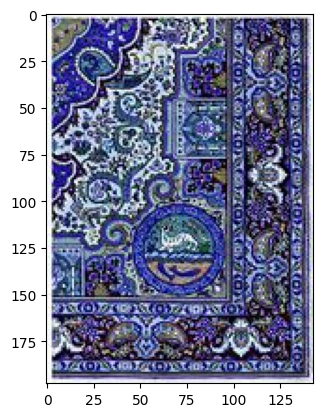

In [30]:
# Flip

flipped_img = cv2.flip(img, 1)
plt.imshow(flipped_img)
plt.show()

### Filtering

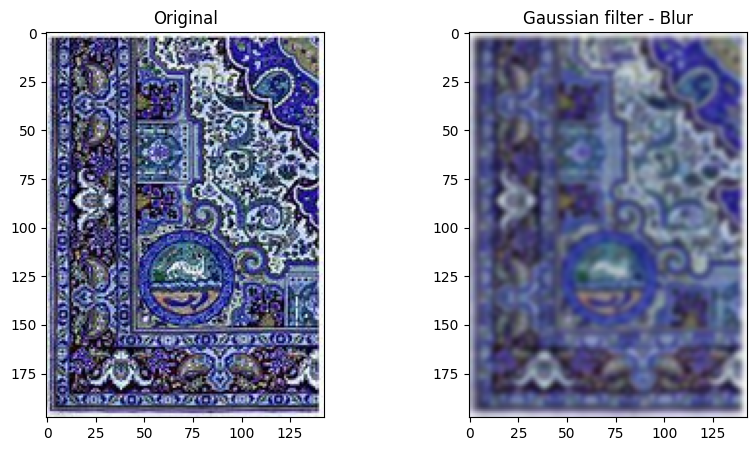

In [31]:
# Gaussian blur
# larger filter size, blurier result
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Original")

img_blur = cv2.GaussianBlur(img, (7, 7), 0)
ax[1].imshow(img_blur)
ax[1].set_title("Gaussian filter - Blur")

plt.show()

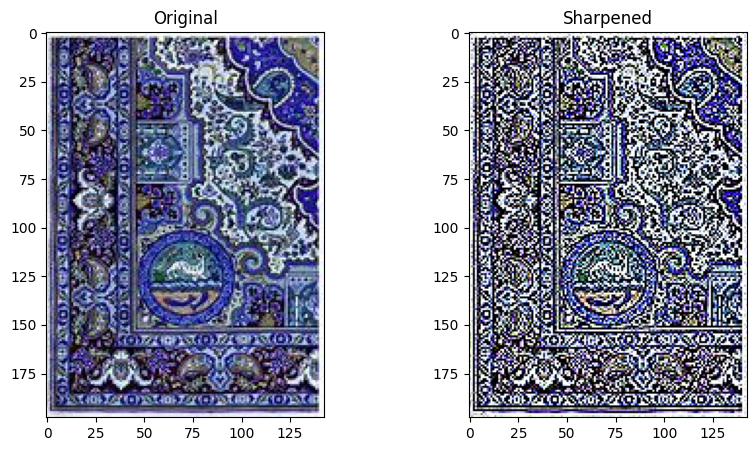

In [32]:
# Sharpening

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title("Original")

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharped = cv2.filter2D(img, -1, kernel)
ax[1].imshow(img_sharped)
ax[1].set_title("Sharpened")

plt.show()

### Histogram filtered image

In [33]:
# Convert to Gray
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_sharp_gray = cv2.cvtColor(img_sharped, cv2.COLOR_RGB2BGR)

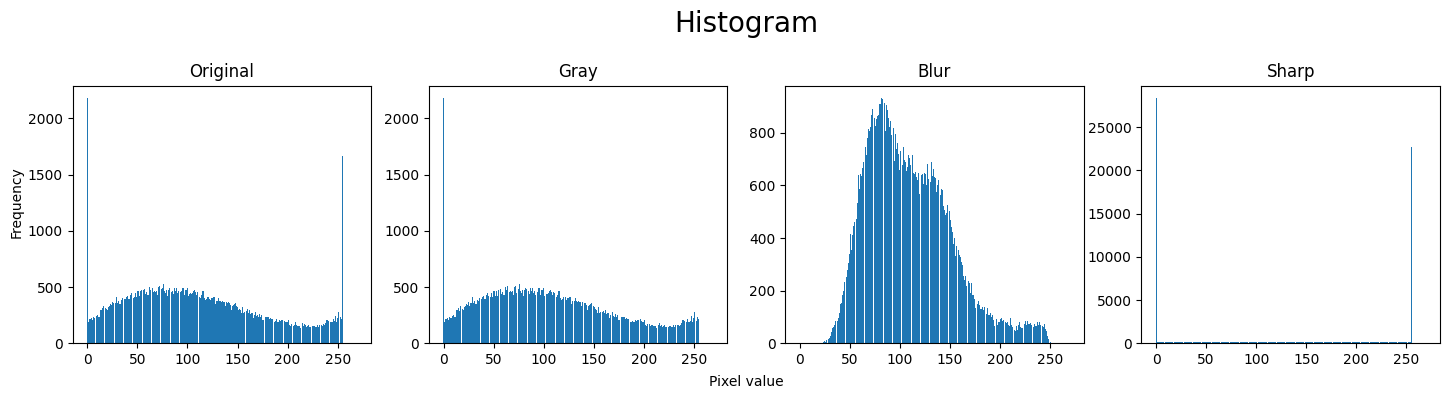

In [34]:
# Compare the histogram of image in different modes

fig, ax = plt.subplots(1, 4, figsize=(16,4))

# shared title
fig.suptitle('Histogram', fontsize=20)
# shared x-axis label
fig.text(0.5, 0.04, 'Pixel value', ha='center', fontsize=10)
# shared y-axis label
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=10)
# Adjust the layout to make room for the labels
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


ax[0].hist(img.ravel(), bins=300, range=[-1, 270])
ax[0].set_title("Original")

ax[1].hist(img_gray.ravel(), bins=300, range=[-1, 270])
ax[1].set_title("Gray")

ax[2].hist(img_blur.ravel(), bins=300, range=[-1, 270])
ax[2].set_title("Blur")

ax[3].hist(img_sharped.ravel(), bins=300, range=[-1, 270])
ax[3].set_title("Sharp")

plt.show()

In [35]:
# Frequency domain

from scipy import fftpack

def get_magnitude_spectrum(image):

  # compare the 2d iscrete Fourier Transform
  f_transform = fftpack.fft2(image)

  # shift the zero-frequency component to the center of the spectrum
  f_transform_shifted = fftpack.fftshift(f_transform)

  # Compute the magnitude spectrum
  magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

  return magnitude_spectrum

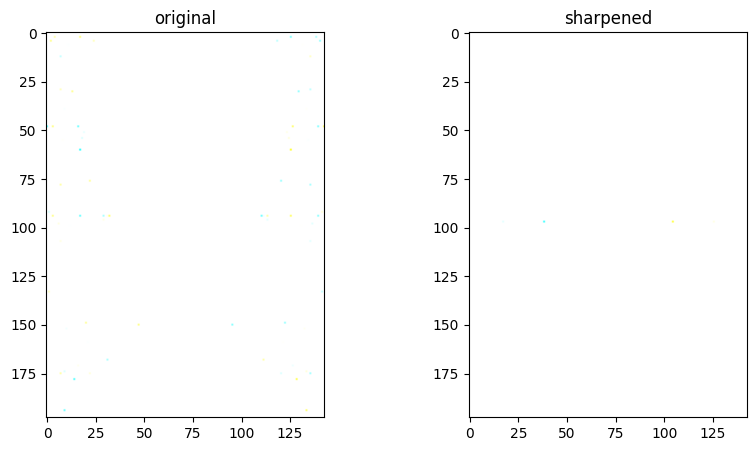

In [36]:
mag_spec_original = get_magnitude_spectrum(img_gray)
mag_spec_sharpened = get_magnitude_spectrum(img_sharp_gray)

fix, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mag_spec_original)
ax[0].set_title("original")

ax[1].imshow(mag_spec_sharpened)
ax[1].set_title("sharpened")

plt.show()